1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64
min x: 0
max x: 255
Epoch 1/100
600/600 [==============================] - 3s 5ms/step - loss: 1.0291 - accuracy: 0.8568 - val_loss: 0.9093 - val_accuracy: 0.8771
Epoch 2/100
600/600 [==============================] - 3s 4ms/step - loss: 0.8667 - accuracy: 0.8885 - val_loss: 0.7849 - val_accuracy: 0.9082
Epoch 3/100
600/600 [==============================] - 3s 5ms/step - loss: 0.7926 - accuracy: 0.9009 - val_loss: 0.7924 - val_accuracy: 0.8918
Epoch 4/100
600/600 [==============================] - 3s 5ms/step - loss: 0.7399 - accuracy: 0.9090 - val_loss: 0.7302 - val_accuracy: 0.9086
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.6983 - accuracy: 0.9154 - val_loss: 0.6835 - val_accuracy: 0.9181
Epoch 6/100
600/600 [==============================] - 3s 5ms/step - loss: 0.6803 - accuracy: 0.9150 - val_loss: 0.6716 - val_accuracy: 0.9178
Epoch 7/1

600/600 [==============================] - 4s 6ms/step - loss: 0.5401 - accuracy: 0.9474 - val_loss: 0.5359 - val_accuracy: 0.9491
Epoch 58/100
600/600 [==============================] - 4s 6ms/step - loss: 0.5452 - accuracy: 0.9463 - val_loss: 0.5674 - val_accuracy: 0.9414
Epoch 59/100
600/600 [==============================] - 4s 7ms/step - loss: 0.5410 - accuracy: 0.9474 - val_loss: 0.5451 - val_accuracy: 0.9458
Epoch 60/100
600/600 [==============================] - 4s 6ms/step - loss: 0.5394 - accuracy: 0.9468 - val_loss: 0.5427 - val_accuracy: 0.9439
Epoch 61/100
600/600 [==============================] - 4s 6ms/step - loss: 0.5396 - accuracy: 0.9467 - val_loss: 0.5623 - val_accuracy: 0.9397
Epoch 62/100
600/600 [==============================] - 3s 6ms/step - loss: 0.5383 - accuracy: 0.9481 - val_loss: 0.5474 - val_accuracy: 0.9496
Epoch 63/100
600/600 [==============================] - 3s 5ms/step - loss: 0.5439 - accuracy: 0.9467 - val_loss: 0.5448 - val_accuracy: 0.9489
Epoch

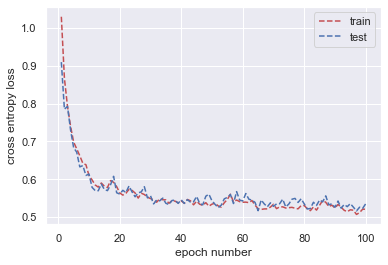

In [2]:
##################################################
##  imports
import numpy as np
import pandas as pd

from keras import models
from keras import layers
from keras import regularizers

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

##################################################
### data
trainD = pd.read_csv("mnist-train.csv")
trD = trainD.to_numpy()
testD = pd.read_csv("mnist-test.csv")
teD = testD.to_numpy()

ytr = trD[:,-1]; xtr = trD[:,0:-1]
yte = teD[:,-1]; xte = teD[:,0:-1]
nx = xtr.shape[1]

#dist of y
print(pd.Series(ytr).value_counts())
# range of x
print('min x:',xtr.min())
print('max x:',xtr.max())

# we need to dummy up (one-hot) y
one_hot = LabelBinarizer()
ytrD = one_hot.fit_transform(ytr)
yteD = one_hot.fit_transform(yte)

##################################################
### keras

nmod = models.Sequential()

#l1p = .000001
l1p = .0001 #L1 penalty
## at two hidden layers with 200 units and tanh activation and L1 regularization
nmod.add(layers.Dense(units=200,activation='tanh',kernel_regularizer=regularizers.l1(l1p),input_shape=(nx,)))
nmod.add(layers.Dense(units=200,activation='tanh',kernel_regularizer=regularizers.l1(l1p)))
# final layer is multinomial outputt so we use softmax with num units = num categories for y
nmod.add(layers.Dense(units=10,activation='softmax'))

#nmod.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
nmod.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

nhist = nmod.fit(xtr,ytrD,epochs=100,verbose=1,batch_size=100, validation_data=(xte,yteD))


##################################################
### plot
trL = nhist.history['loss']
teL = nhist.history['val_loss']

epind = range(1,len(teL)+1)
plt.plot(epind,trL,"r--")
plt.plot(epind,teL,"b--")
plt.xlabel("epoch number"); plt.ylabel("cross entropy loss")
plt.legend(['train','test'])
#plt.show()
plt.savefig("keras_simple-mnist.pdf")

phat = nmod.predict(xte)
yhat = [np.argmax(x) for x in phat]

##crosstab
ctab = pd.crosstab(pd.Series(yhat),pd.Series(yte))
print(ctab)

print("the accuracy is: ",accuracy_score(yhat,yte))
#print(confusion_matrix(yhat,yte))
